In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
d0 = pd.read_csv('mnist_train.csv')

print(d0.head(5)) # print first five rows of d0.

# save the labels into a variable l.
l = d0['label']
#l stores class lables
#pixel 0 to 783  (28x)

# Drop the label feature and store the pixel data in d.
d = d0.drop("label",axis=1)
#d stores data

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

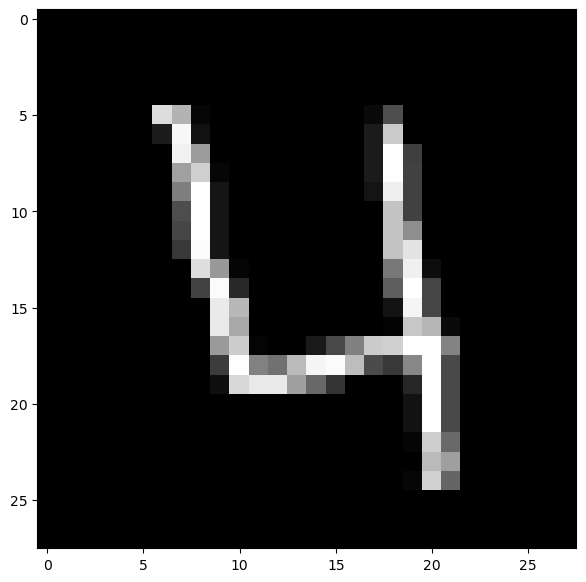

4


In [3]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 3 #any index

grid_data = d.iloc[idx].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])

# Standardization

In [4]:
# Pick first 42K data-points to work on
labels = l.head(42000)
data = d.head(42000)

print("the shape of sample data = ", data.shape)


the shape of sample data =  (42000, 784)


In [5]:
# Data-preprocessing: Standardizing the data 
#COLUMN STANDARDIZATION

from sklearn.preprocessing import StandardScaler

standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(42000, 784)


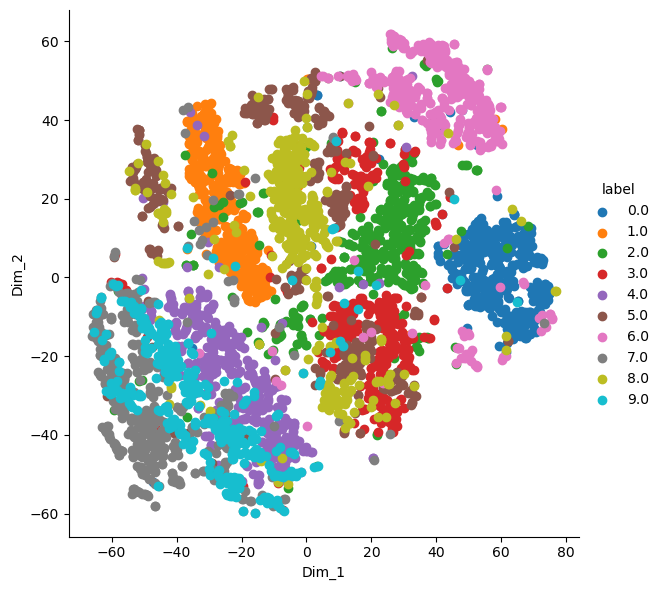

In [6]:
# t-SNE

#CASE 1: perplexity=30 and n_iter=1000

from sklearn.manifold import TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 15K,42K points
data_42K = standardized_data[0:4200,:]
labels_42K = labels[0:4200]

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

#random_state=0 --> t-SNE is randomized alog so slightly diff o/p everytime without it
#n_components=2 --> 2D

tsne_data = model.fit_transform(data_42K)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_42K)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

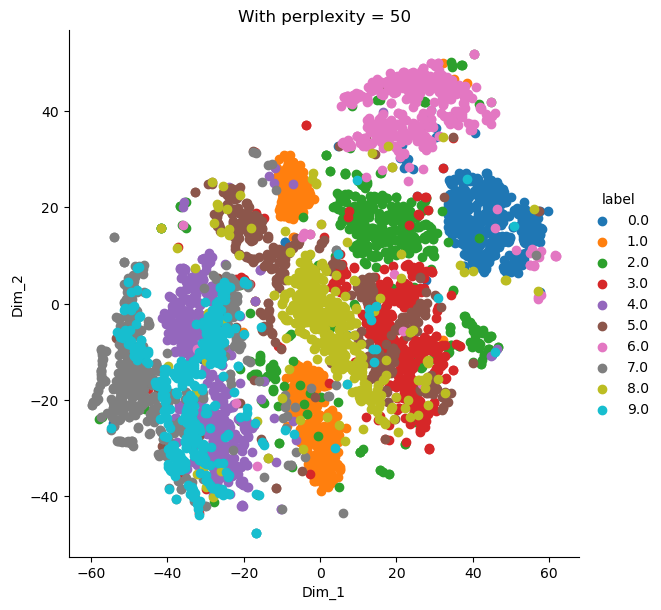

In [7]:
#CASE 2: perplexity=50 and n_iter=1000

model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_42K) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_42K)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()


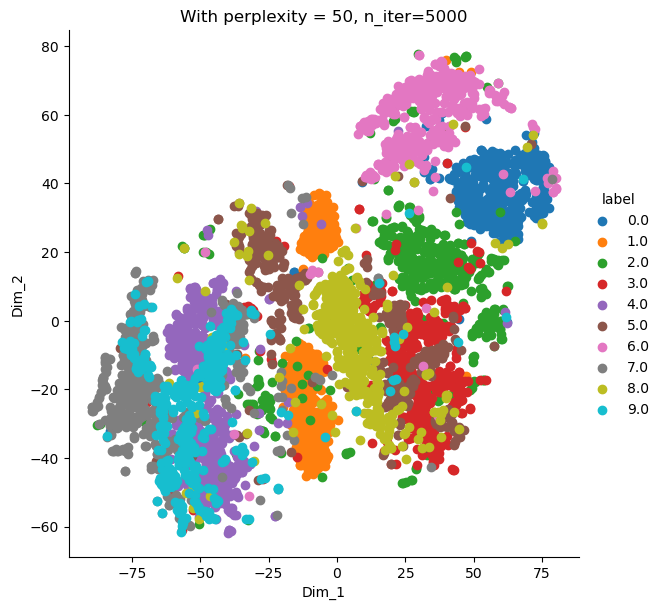

In [8]:
#CASE 3: perplexity=50 and n_iter=5000
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsne_data = model.fit_transform(data_42K) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_42K)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()

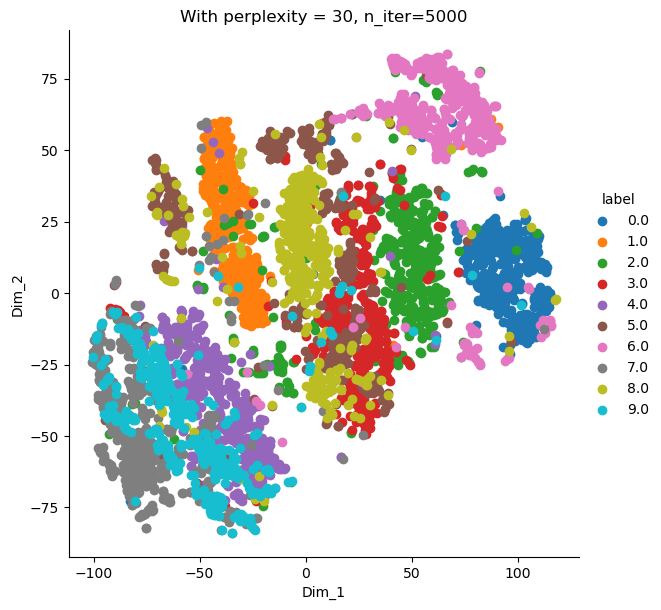

In [9]:
#CASE 3: perplexity=30 and n_iter=5000
model = TSNE(n_components=2, random_state=0, perplexity=30,  n_iter=5000)
tsne_data = model.fit_transform(data_42K) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_42K)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 30, n_iter=5000')
plt.show()